<a href="https://colab.research.google.com/github/Janeli-m/October-2020-WaiLEARN-004/blob/master/Online_Retail_Janeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Libraries that needed to be imported to read and create visualizations


In [ ]:
# import library
import pandas as pd
from datetime import datetime #to fix the date
import numpy as np
import datetime as dt

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns


2. Data insights

*  The dataset has 541,909 rows and 8 columns
*  The variables CustomerId and Description are the ones with the highest number of missing values.
*  The average product price is 4.61 pounds (in the part where we run the "**describe**" code the *mean* is 4.61 )
*  The following variables need to be converted in the next steps: CustomerId to object.







In [ ]:
data = pd.read_csv('/content/Online Retail.csv', encoding= 'latin1')
data.head(5)
  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France


In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


3. Data Manipulation



*   Drop the raws with null values 
*   Convert **Invoice Date** to datetime64 and **CustomerID **  to object



In [ ]:
data = data.dropna(subset=['CustomerID'])

In [ ]:
data1 = data.dropna(subset=['CustomerID'])

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.shape

(406829, 8)

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate)

In [ ]:
data['CustomerID'] = data ['CustomerID']. astype (str)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
data['Quantity'] * data['UnitPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Length: 406829, dtype: float64

In [ ]:
data ['Total Price'] = data['Quantity'] * data['UnitPrice']

In [ ]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
df = data.groupby('Country', as_index= False).InvoiceNo.count().sort_values(by= 'InvoiceNo',ascending=False)
df.head(5)

,Country,InvoiceNo
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533


In [ ]:
df = data.groupby('Country', as_index= False).Quantity.sum().sort_values(by= 'Quantity',ascending=False)
df.head(5)

,Country,Quantity
35,United Kingdom,4008533
23,Netherlands,200128
10,EIRE,136329
14,Germany,117448
13,France,109848


The 10 countries with the highest number of sales

In [ ]:
df = data.groupby('Country', as_index= False).agg({'InvoiceNo': pd.Series.count, 'Quantity': pd.Series.sum, 'Total Price':pd.Series.sum,}).sort_values(by= 'InvoiceNo',ascending=False)
df.head(10)

,Country,InvoiceNo,Quantity,Total Price
35,United Kingdom,361878,4008533,6767873.394
14,Germany,9495,117448,221698.210
13,France,8491,109848,196712.840
10,EIRE,7485,136329,250285.220
30,Spain,2533,26824,54774.580
23,Netherlands,2371,200128,284661.540
3,Belgium,2069,23152,40910.960
32,Switzerland,1877,29778,55739.400
26,Portugal,1480,16044,29059.810
0,Australia,1259,83653,137077.270


In [ ]:
df = data.groupby('Description', as_index= False).Quantity.sum().sort_values(by= 'Quantity',ascending=False)
df.head(10)

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


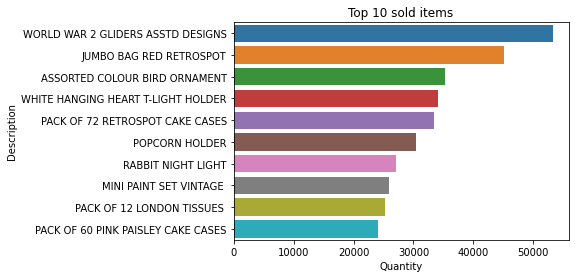

In [ ]:
df = data.groupby('Description', as_index= False).Quantity.sum().sort_values(by= 'Quantity',ascending=False)
#Plot the 10 most sold items
sns.barplot(x='Quantity', y='Description', data= df.head(10))
plt.title('Top 10 sold items')
plt.show()

COHORT ANALYSIS

In [ ]:
#Createa copy of the data for the cohort analysis
cohort = data1.copy() 

In [ ]:
print(data1)

       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
541904    581587     22613  ...    12680.0          France
541905    581587     22899  ...    12680.0          France
541906    581587     23254  ...    12680.0          France
541907    581587     23255  ...    12680.0          France
541908    581587     22138  ...    12680.0          France

[406829 rows x 8 columns]


In [ ]:
data1['CustomerID'] = data1['CustomerID'].astype(str)

In [ ]:
#Use the datetime fundtion to create a Month column (without the time)
def get_month(x):
    return dt.datetime(x.year,x.month,1) 

#Create a new colum "InvoiceMonth
cohort['InvoiceMonth'] = cohort ['InvoiceDate'].apply(get_month) 

#Create a 'CohortMonth' column by grouping 'CustomerID' and selec the 'InvoiceMonth' value
grouping = cohort.groupby ('CustomerID')['InvoiceMonth']

#With code (transform) assign the minimum InvoiceMonth value to the dataset
cohort['CohortMonth']= grouping.transform('min')

AttributeError: ignored

In [ ]:
cohort.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
#When pass a datetime column this funtions splits out year, month and day 
def get_date_int (df, column):
  year = df[column].dt.year
  month = df[column].dt.month
  return year, month

In [ ]:
# Split the "InvoiceMonth" column to get the integers from data 
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Split the "CohortMonth" column to get the integers from data 
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

KeyError: ignored

In [ ]:
# To creat the 'CohortIndex' we need to create a variable call year_diff (diffrence between the invoice year and cohort year)
year_diff = invoice_year - cohort_year

# Difference between invoice_month and cohort_month
month_diff = invoice_month - cohort_month

In [ ]:
#Now we create the 'CohortIndex' column 
cohort'CohortIndex'[] = year_diff * 12 + month_diff + 1 

In [ ]:
print(cohort['CohortIndex'].nunique())

24


In [ ]:
cohort.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,InvoiceMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,10.20,2011-09-01,2011-08-01,2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60,2011-09-01,2011-08-01,2
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,2011-09-01,2011-08-01,2
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,2011-09-01,2011-08-01,2
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680.0,France,14.85,2011-09-01,2011-08-01,2


In [ ]:
#Group the data by colums 'CohortMonth' and 'CohortIndex'
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [ ]:
print(cohort_counts)

CohortIndex     1      2      3      4      5   ...    20    21    22    23    24
CohortMonth                                     ...                              
2010-01-01    98.0    9.0    4.0    NaN    7.0  ...  37.0  41.0  44.0  40.0  23.0
2010-02-01   108.0    2.0    NaN    NaN    3.0  ...  41.0  45.0  53.0  19.0   NaN
2010-03-01    49.0    NaN    1.0    1.0    1.0  ...  24.0  23.0   9.0   NaN   NaN
2010-05-01    68.0    3.0    3.0    2.0    3.0  ...  20.0   NaN   NaN   NaN   NaN
2010-06-01    76.0    2.0    4.0    4.0    1.0  ...   NaN   NaN   NaN   NaN   NaN
2010-07-01    53.0    2.0    2.0    1.0    NaN  ...   NaN   NaN   NaN   NaN   NaN
2010-08-01    87.0    3.0    2.0    NaN   30.0  ...   NaN   NaN   NaN   NaN   NaN
2010-09-01    83.0    1.0    NaN   23.0   29.0  ...   NaN   NaN   NaN   NaN   NaN
2010-10-01    38.0    NaN   11.0   15.0   12.0  ...   NaN   NaN   NaN   NaN   NaN
2010-12-01   288.0  102.0   79.0   97.0   93.0  ...   NaN   NaN   NaN   NaN   NaN
2011-01-01   599

Creat retention as a percentage 

In [ ]:
# Select all the rows; select the first column
cohort_sizes = cohort_counts.iloc[:,0]

#Devide the cohort by the first column 
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

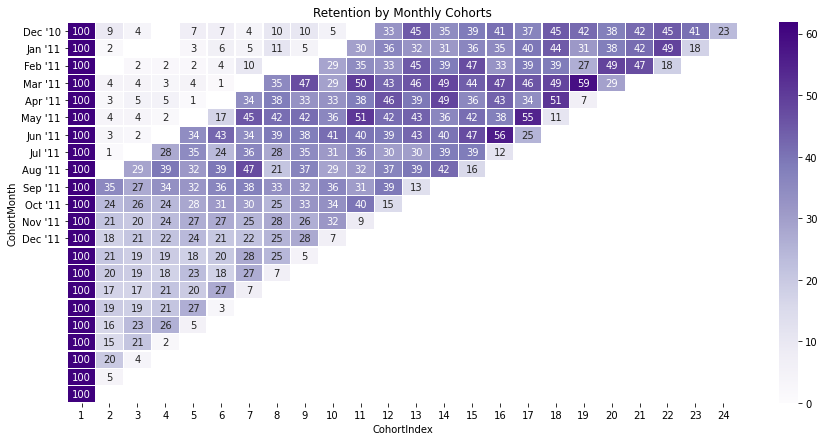

In [ ]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(15,7))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
            annot = True,
            cmap = "Purples",
            vmin = 0.0,
 #          vmax = 0.5,    
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.0f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show();       
